Netflix Titles ML Project

Project overview: Machine Learning project using a Netflix Titles dataset, including movies and tv shows, to make ML models for a recommendation system, genre classification, and ratings prediction.

Objectives:
- Make a ML model to develop a recommendation system.
- Make a ML model to classify genres.
- Make a ML model to predict ratings.
- Evaluate the performance of each model, like it's accuracy and precision.
- Visualize key findings and evaluation metrics.

Dataset: netflix_titles.csv

Dataset overview: CSV file containing 8,807 rows of data related to Netflix movies and TV shows, such as the title, director, cast, year of addition to Netflix, etc.

Import libraries, load dataset, visualize dataframe, get information.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\jpram\Desktop\Desktop\Extracurricular-Projects\netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Data cleaning

In [4]:
# Set show_id as index
df.set_index('show_id', inplace = True)
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [5]:
# Check for duplicates
df.duplicated().sum()

np.int64(3)

In [6]:
# Show duplicates
duplicates = df[df.duplicated()]
print(duplicates)

            type   title            director  \
show_id                                        
s5965    TV Show   9-Feb                 NaN   
s5966      Movie  22-Jul     Paul Greengrass   
s5967      Movie  15-Aug  Swapnaneel Jayakar   

                                                      cast  \
show_id                                                      
s5965    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
s5966    Anders Danielsen Lie, Jon Øigarden, Jonas Stra...   
s5967    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   

                                country date_added  release_year rating  \
show_id                                                                   
s5965                               NaN  20-Mar-19          2018  TV-14   
s5966    Norway, Iceland, United States  10-Oct-18          2018      R   
s5967                             India  29-Mar-19          2019  TV-14   

         duration                             listed_in  \
show_id      

In [7]:
# Check missing data
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# Determine how to deal with missing directors.
# Hypotheses: (a) all movies have directors, (b) most TV shows don't have directors.

# Check hypothesis (a)
movies_nodirectors = df[df['type'] == 'Movie']['director'].isna().any()

# Check hypothesis (b)
tvshows_nodirectors = df[df['type'] == 'TV Show']['director'].isna().sum()
total_tvshows = df[df['type'] == 'TV Show'].shape[0]
tvshow_nanratio = tvshows_nodirectors / total_tvshows

print("There are movies with no directors: ", movies_nodirectors)
print("Ratio of TV shows with no directors: ", tvshow_nanratio)

There are movies with no directors:  True
Ratio of TV shows with no directors:  0.914050822122571


In [9]:
#Hypothesis (a) is false, hypothesis (b) is true.
#Check ratio of movies with no directors.

count_movies_nodirectors = df[df['type'] == 'Movie']['director'].isna().sum()
total_movies = df[df['type'] == 'Movie'].shape[0]
movie_nanratio = count_movies_nodirectors / total_movies

print("Ratio of Movies with no directors: ", movie_nanratio)

Ratio of Movies with no directors:  0.030663839504159192


In [10]:
# Too many rows with NaN values, dropping rows or director column not adequate.
# Use arbitrary imputation for NaN directors, both on Movies and TV Shows.

df['director'].fillna("Unknown", inplace = True)
df['director'].isna().sum()


C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\1969865132.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace = True)


np.int64(0)

In [11]:
# Determine how to deal with missing cast.
# Check cast NaN ratio on both TV Shows and movies.

# Check for Movies.
movies_nocast = df[df['type'] == 'Movie']['cast'].isna().sum()
movies_nocast_nanratio = movies_nocast / total_movies
print("Ratio of Movies with no cast: ", movies_nocast_nanratio)

# Check for TV Shows.
tvshows_nocast = df[df['type'] == 'TV Show']['cast'].isna().sum()
tvshow_nocast_nanratio = tvshows_nocast / total_tvshows
print("Ratio of TV shows with no cast: ", tvshow_nocast_nanratio)

Ratio of Movies with no cast:  0.0774751264067852
Ratio of TV shows with no cast:  0.13079222720478326


In [12]:
# No apparent relationship with type column.
# Use arbitraty imputation, same as director column.

df['cast'].fillna("Unknown", inplace = True)
df['cast'].isna().sum()

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\3731803431.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna("Unknown", inplace = True)


np.int64(0)

In [13]:
# Determine how to deal with missing country.
# Check country NaN ratio on both TV Shows and movies.

# Check for Movies.
movies_nocountry = df[df['type'] == 'Movie']['country'].isna().sum()
movies_nocountry_nanratio = movies_nocountry / total_movies
print("Ratio of Movies with no country: ", movies_nocountry_nanratio)

# Check for TV Shows.
tvshows_nocountry = df[df['type'] == 'TV Show']['country'].isna().sum()
tvshow_nocountry_nanratio = tvshows_nocountry / total_tvshows
print("Ratio of TV shows with no country: ", tvshow_nocountry_nanratio)

Ratio of Movies with no country:  0.0717664328820747
Ratio of TV shows with no country:  0.1461136023916293


In [14]:
# Note: TV Shows NaN ratio is roughly double of Movies NaN ratio.
# Use mode imputation
df['country'].fillna(df['country'].mode()[0], inplace = True)

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\3741079235.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace = True)


In [15]:
# Determine how to deal with missing date of addition.
# Standardize date into dd/mm/yyyy format.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].dt.strftime('%d-%m-%Y')

df['date_added']

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\2417920065.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


show_id
s1       25-09-2021
s2       24-09-2021
s3       24-09-2021
s4       24-09-2021
s5       24-09-2021
            ...    
s8803    20-11-2019
s8804    01-07-2019
s8805    01-11-2019
s8806    11-01-2020
s8807    02-03-2019
Name: date_added, Length: 8807, dtype: object

In [16]:
# Only year of addition is relevant.
# Add column of year of addition.
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

df['year_added']

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\346682051.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_added'] = pd.to_datetime(df['date_added'])


show_id
s1       2021.0
s2       2021.0
s3       2021.0
s4       2021.0
s5       2021.0
          ...  
s8803    2019.0
s8804    2019.0
s8805    2019.0
s8806    2020.0
s8807    2019.0
Name: year_added, Length: 8807, dtype: float64

In [17]:
# Use mode imputation
df['year_added'].fillna(df['year_added'].mode()[0], inplace= True)

# Cast into int
df['year_added'] = df['year_added'].apply(int)

#Drop date_added and release_year columns
df = df.drop(['date_added', 'release_year'], axis = 1)

In [18]:
# Check data with missing rating.
print(df[df['rating'].isna()])

            type                                              title  \
show_id                                                               
s5990      Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
s6828    TV Show                  Gargantia on the Verdurous Planet   
s7313    TV Show                                       Little Lunch   
s7538      Movie                               My Honor Was Loyalty   

                director                                               cast  \
show_id                                                                       
s5990            Unknown                        Oprah Winfrey, Ava DuVernay   
s6828            Unknown  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
s7313            Unknown  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
s7538    Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

               country rating  duration                             listed_in  \
show_id          

In [19]:
# Drop rows with missing rating.
df.dropna(subset = ['rating'], inplace = True)

In [20]:
# Check data with missing duration.
print(df[df['duration'].isna()])

          type                                 title    director        cast  \
show_id                                                                        
s5542    Movie                       Louis C.K. 2017  Louis C.K.  Louis C.K.   
s5795    Movie                 Louis C.K.: Hilarious  Louis C.K.  Louis C.K.   
s5814    Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

               country  rating duration listed_in  \
show_id                                             
s5542    United States  74 min      NaN    Movies   
s5795    United States  84 min      NaN    Movies   
s5814    United States  66 min      NaN    Movies   

                                               description  year_added  
show_id                                                                 
s5542    Louis C.K. muses on religion, eternal love, gi...        2017  
s5795    Emmy-winning comedy writer Louis C.K. brings h...        2016  
s5814    The comic puts his trademark hil

In [21]:
# Actual duration is placed in the rating column. Interchanging values doesn't give rating either way.
# Drop rows with missing duration.
df.dropna(subset = ['duration'], inplace= True)
df

,type,title,director,cast,country,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, s1 to s8807
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         8800 non-null   object
 1   title        8800 non-null   object
 2   director     8800 non-null   object
 3   cast         8800 non-null   object
 4   country      8800 non-null   object
 5   rating       8800 non-null   object
 6   duration     8800 non-null   object
 7   listed_in    8800 non-null   object
 8   description  8800 non-null   object
 9   year_added   8800 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 756.2+ KB


Exploratory Data Analysis (EDA)

In [23]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Rename columns
df = df.rename(columns={'listed_in': 'genres', 'year_added': 'year of addition'})
df

,type,title,director,cast,country,rating,duration,genres,description,year of addition
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, s1 to s8807
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              8800 non-null   object
 1   title             8800 non-null   object
 2   director          8800 non-null   object
 3   cast              8800 non-null   object
 4   country           8800 non-null   object
 5   rating            8800 non-null   object
 6   duration          8800 non-null   object
 7   genres            8800 non-null   object
 8   description       8800 non-null   object
 9   year of addition  8800 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 756.2+ KB


In [26]:
# Univariate analysis

# Statistics for year of addition
df.describe()

,year of addition
count,8800.000000
mean,2018.873750
std,1.572679
min,2008.000000
25%,2018.000000
50%,2019.000000
75%,2020.000000
max,2021.000000


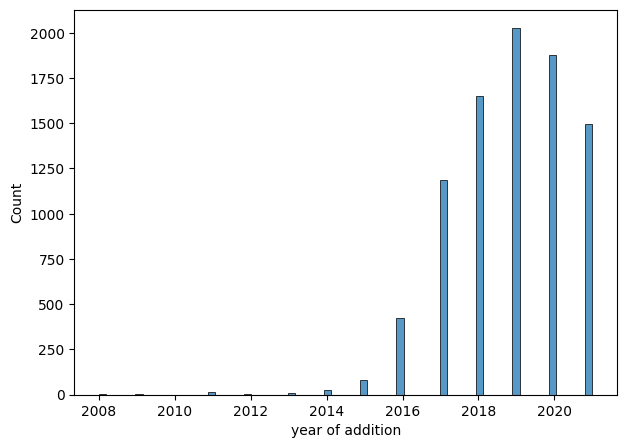

In [27]:
# Average title added in 2018-2019, oldest titles added in 2008, newest titles added in 2021.

# Histogram for year of addition
plt.figure(figsize=(7, 5))
sns.histplot(df['year of addition'], kde= False)
plt.show()

<Axes: ylabel='year of addition'>

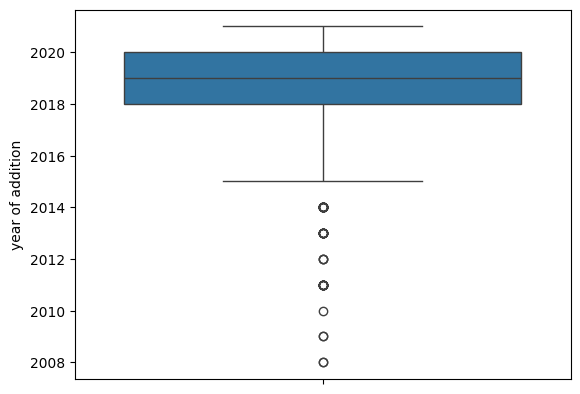

In [28]:
# Most titles added in 2019, 2020, and 2018. Possible outliers in titles added from 2008-2013?

# Box plot for year
sns.boxplot(df['year of addition'])

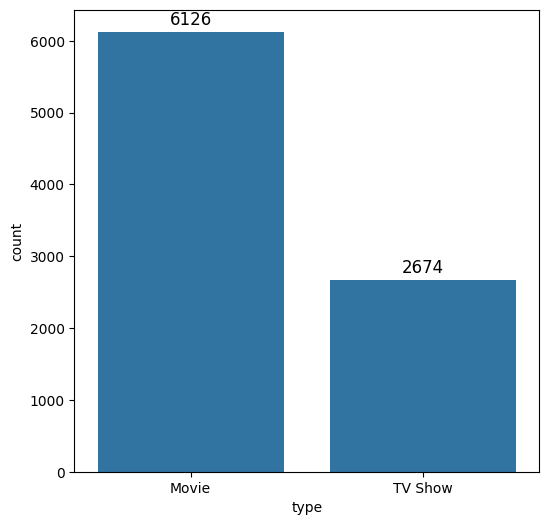

In [29]:
# Definite outliers in titles added from 2008-2014.

# Count plots for type and ratings
# For type
plt.figure(figsize=(6, 6))
type_count = sns.countplot(x = df['type'], data = df)
for p in type_count.patches:
    type_count.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 12, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

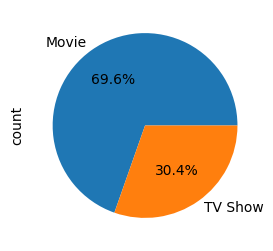

In [30]:
# Pie chart for type
plt.figure(figsize=(3, 3))
type_piechart = df['type'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show

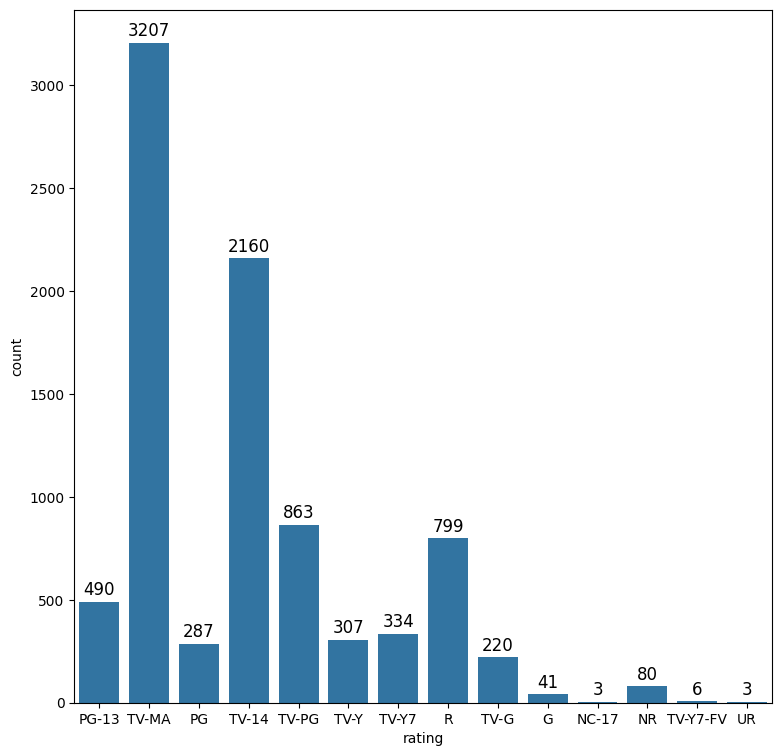

In [31]:
# Roughly 2.3 more movies than TV shows

# For rating
plt.figure(figsize=(9, 9))
rating_count = sns.countplot(x = df['rating'], data = df)
for p in rating_count.patches:
    rating_count.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 12, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')
plt.show()

In [32]:
# 3 most frequent ratings: TV-MA, TV-14, TV-PG
# 3 least frequent ratings: NC-17, UR, TV-Y7-FV

# Data transformation

print(df['country'].unique())

['United States' 'South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United States' 'United States, Germa

In [33]:
# Most entries have several countries, many of these countries are repeated.

print(df['genres'].unique())

['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International Movies, Music & 

In [34]:
# Same thing with genres.

# Perform one-hot encoding with top 3 most common countries and genres, add an "Other" column.

# Split strings into lists for both countries and genres.
df['country'] = df['country'].apply(lambda x: x.split(', '))
df['genres'] = df['genres'].apply(lambda x: x.split(', '))

In [35]:
# Define function to find top N occurrences and one-hot encode.
def top_n_encoder(df, column, top_n = 3):
    # Get top N values
    all_values = [item for sublist in df[column] for item in sublist]
    top_n_values = pd.Series(all_values).value_counts().head(top_n).index.tolist()

    # New column for each top N value, one_hot encode
    for value in top_n_values:
        df[f'{column}_{value}'] = df[column].apply(lambda x: 1 if value in x else 0)

    # New column for anything not in top N
    df[f'{column}_other'] = df[column].apply(lambda x: 1 if not any(val in top_n_values for val in x) else 0)

    return df

# Apply function to countries and genres columns
df = top_n_encoder(df, 'country', top_n=3)
df = top_n_encoder(df, 'genres', top_n=3)

df

,type,title,director,cast,country,rating,duration,genres,description,year of addition,country_United States,country_India,country_United Kingdom,country_other,genres_International Movies,genres_Dramas,genres_Comedies,genres_other
show_id,,,,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,[United States],PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,1,0,0,0,0,0,0,1
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021,0,0,0,1,0,0,0,1
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[United States],TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021,1,0,0,0,0,0,0,1
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,[United States],TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021,1,0,0,0,0,0,0,1
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019,1,0,0,0,0,1,0,0
s8804,TV Show,Zombie Dumb,Unknown,Unknown,[United States],TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2019,1,0,0,0,0,0,0,1
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019,1,0,0,0,0,0,1,0


In [36]:
# After one-hot encoding, drop country and genres columns.
df = df.drop(columns=['country', 'genres'])

In [37]:
print(df['duration'].unique())

['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'
 '189 min' '141 min' '130 min' '138 min' '81 min' '132 min' '10 Seasons'
 '123 min' '65 min' '68 min' '66 min' '62 min' '74 min' '131 min' '39 min'
 '46 m

In [38]:
# Numerous unique values, create new column categorizing them into short, standard, or long movie or show depending on duration.

# Function for duration
def duration_label(row):
    # Check if movie or TV show
    if 'Season' in row:
        # Handle exceptions
        try:
            seasons = int(row.split()[0])
        except ValueError:
            return 'Unknown series'
        
        #Categorize
        if seasons == 1:
            return 'Short series'
        elif 2 <= seasons <= 4:
            return 'Standard series'
        else:
            return 'Long series'
        
    else:
        # Handle exceptions
        try:
            minutes = int(row.split()[0])
        except ValueError:
            return 'Unknown movie'
        
        # Categorize
        if minutes <= 89:
            return 'Short movie'
        elif 90 <= minutes <= 135:
            return 'Standard movie'
        else:
            return 'Long movie'
        
df['length'] = df['duration'].apply(duration_label)

df.drop(columns = ['duration'], inplace = True)

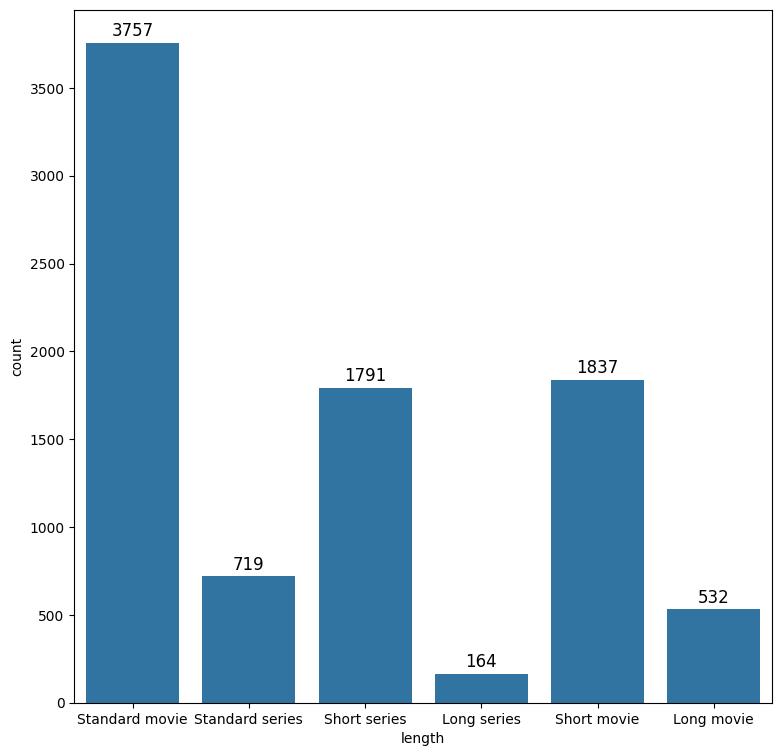

In [39]:
# Count plot for length
plt.figure(figsize=(9, 9))
length_count = sns.countplot(x = df['length'], data = df)
for p in length_count.patches:
    length_count.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 12, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

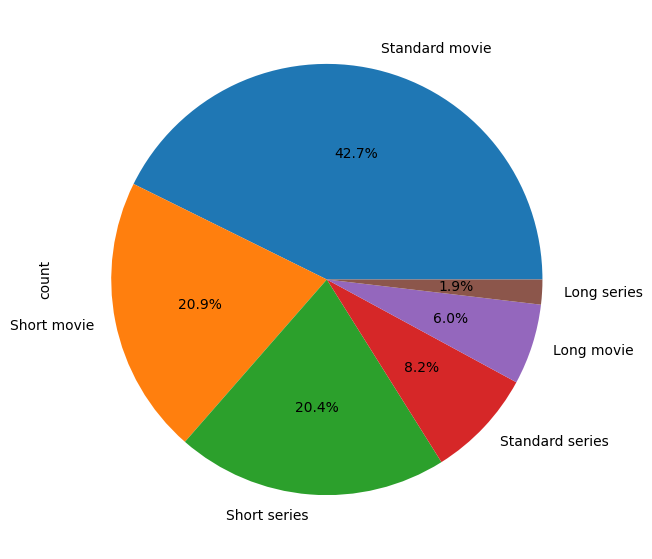

In [40]:
# Most titles are short series and short and standard movies.

# Pie chart for length.
plt.figure(figsize=(7, 7))
length_piechart = df['length'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show

In [41]:
# Rename columns for countries and genres
df = df.rename(columns={'country_United States': 'United States', 'country_India': 'India', 'country_United Kingdom': 'United Kingdom', 'country_other': 'Other country',
                        'genres_International Movies': 'International Movies', 'genres_Dramas': 'Dramas', 'genres_Comedies': 'Comedies', 'genres_other': 'Other genres'})

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\1132847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  country_chart = sns.barplot(x=country_count.index, y=country_count.values, palette='dark')


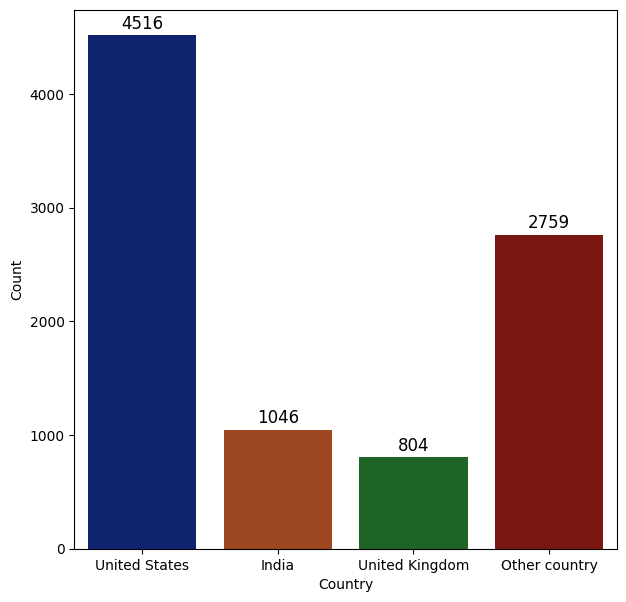

In [42]:
# Distribution of countries
countries = ['United States', 'India', 'United Kingdom', 'Other country']
country_count = df[countries].sum()

plt.figure(figsize=(7, 7))
country_chart = sns.barplot(x=country_count.index, y=country_count.values, palette='dark')
for p in country_chart.patches:
    country_chart.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 12, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

C:\Users\jpram\AppData\Local\Temp\ipykernel_24760\2916288785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  genres_plot = sns.barplot(x=genres_count.index, y=genres_count.values, palette='bright')


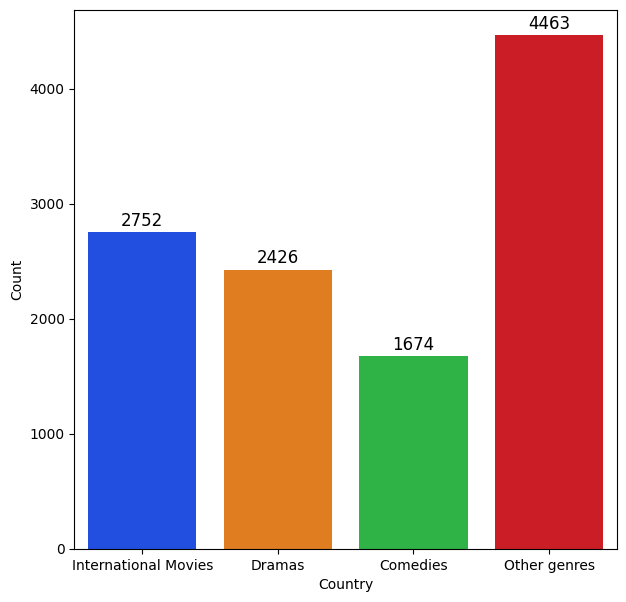

In [43]:
# Most movies were produced in the US, then in other countries.

# Distribution of genres
genres = ['International Movies', 'Dramas', 'Comedies', 'Other genres']
genres_count = df[genres].sum()

plt.figure(figsize=(7, 7))
genres_plot = sns.barplot(x=genres_count.index, y=genres_count.values, palette='bright')
for p in genres_plot.patches:
    genres_plot.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline', fontsize = 12, color = 'black', 
                        xytext = (0, 5), textcoords = 'offset points')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

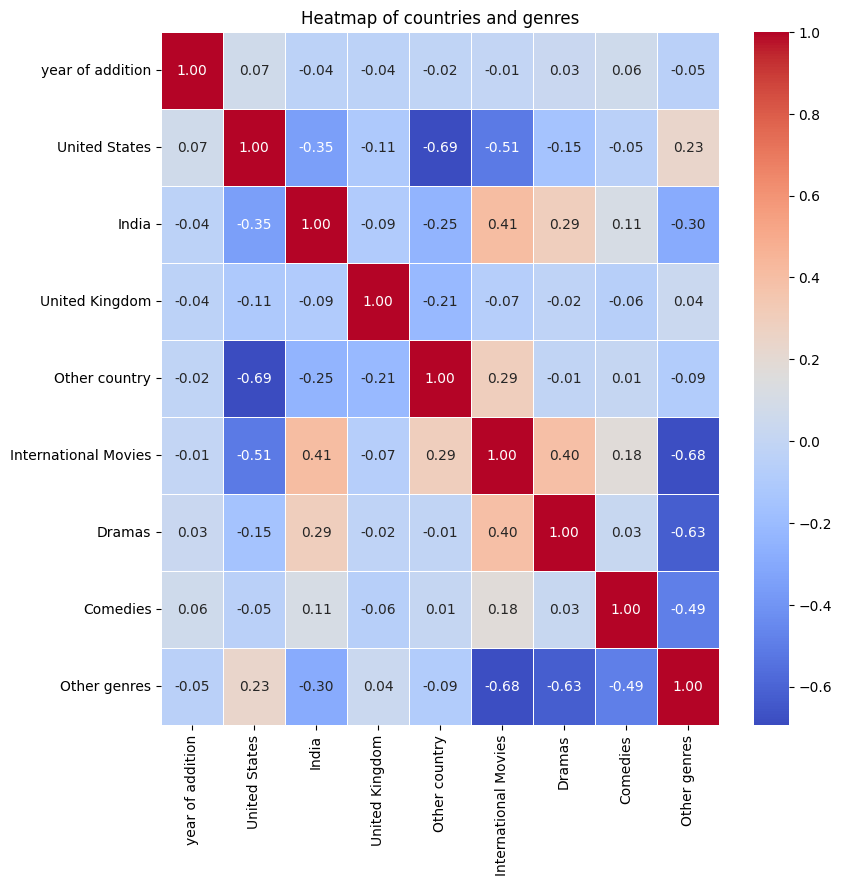

In [44]:
# Most titles are of other genres than international movies, dramas, or comedies.

#Multivariate analysis

num_df = df.select_dtypes(include='number')

# Heatmap
corr_matrix = num_df.corr()

plt.figure(figsize=(9, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of countries and genres")
plt.show()

In [45]:
# There is a somewhat negative correlation between titles produced in the US and international movies (-0.51)
# There's a somewhat positive correlation between titles produced in India and international movies (0.41)